# Features

<br>

### Task description 

1. Download the mushroom dataset here: https://archive.ics.uci.edu/ml/datasets/Mushroom
2. Load the dataset from CSV into pandas.
3. Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?
4. The data is entirely categorical. Convert each feature to dummy variables.
5. Visualise the feature space.

<br>

#### UCI Mushroom Dataset

The UCI Mushroom Dataset is a collection of data used to classify mushrooms as either edible or poisonous. It consists of 8,124 samples, each described by 22 categorical features like cap shape, color, odor, and gill size. The goal is to use these characteristics to predict whether a mushroom is safe to eat.

<br>

#### Features

Features are variables that describe data. In a dataset, each feature is a specific attribute or characteristic of the data you're working with. In a mushroom dataset, features could be things like "cap color," "cap shape," or "odor."



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the UCI mushroom dataset.
mushroom_data = pd.read_csv('data/agaricus-lepiota.data') # Read the data from the csv file into a dataframe.
mushroom_data.head() # Show the first five rows in the dataset to verify.

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Provides statistic for each column. 
# count: Number of non-missing (non-NaN) entries.
# unique: Number of unique categories or distinct values in the column.
# top: The most frequent category (mode).
# freq: The frequency (count) of the most frequent category.
mushroom_data.describe() 

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


edibility     e     p
habitat              
d          1880  1268
g          1408   740
l           240   592
m           256    36
p           136  1008
u            96   272
w           192     0


<Axes: title={'center': 'Habitat vs Edibility'}, xlabel='habitat'>

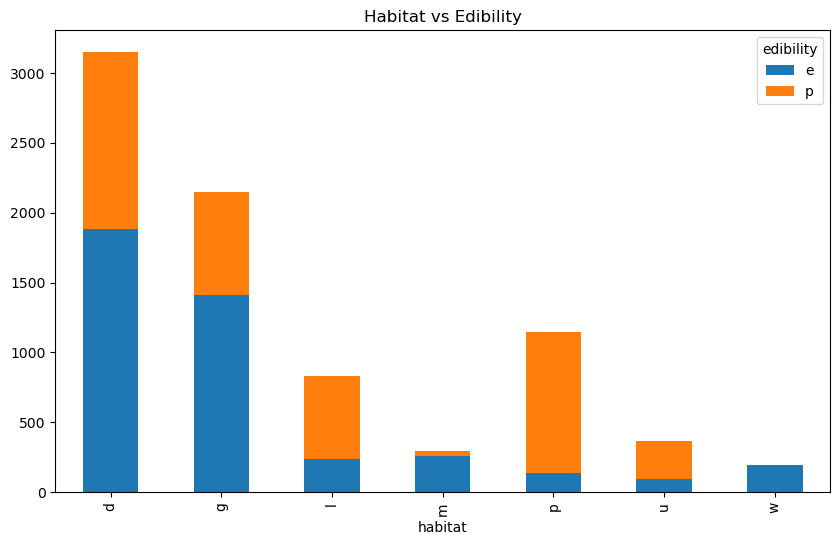

In [4]:
# Explore the distribution in the data. 

# Explore the relationship between habitat and edibility (e=edible, p=poisonous).
habitat_vs_edibility = pd.crosstab(mushroom_data['habitat'], mushroom_data['edibility'])
print(habitat_vs_edibility) # Display the crosstab.
habitat_vs_edibility.plot(kind='bar', stacked=True, figsize=(10,6), title="Habitat vs Edibility") # Visualize the crosstab.

cap-shape    b  c     f    k   s     x
habitat                               
d           10  0  1366  214   0  1558
g          242  0   802   96   0  1008
l           52  4   260  260   0   256
m          146  0    18    0   0   128
p            2  0   474  194   0   474
u            0  0   168    0  32   168
w            0  0    64   64   0    64


<Axes: title={'center': 'Cap Shape Distribution Across Habitats'}, xlabel='habitat'>

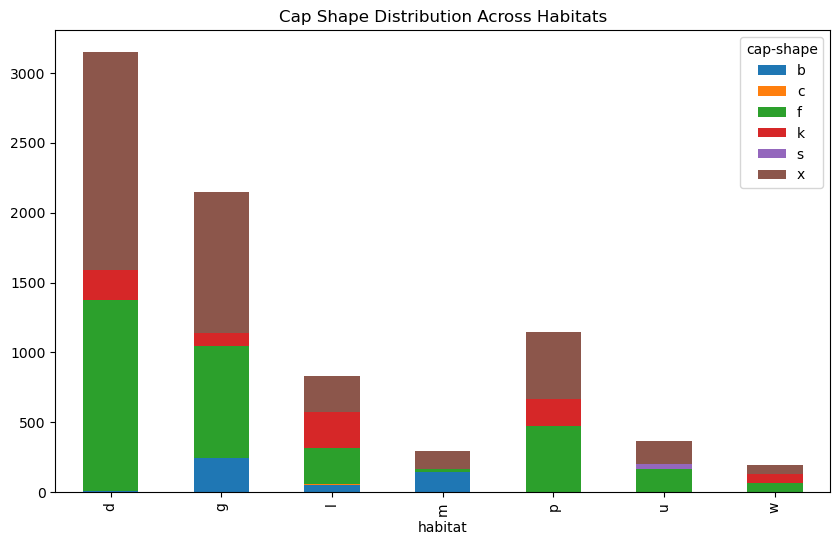

In [5]:
# Explore the relationship between habitat and cap shape.
habitat_vs_cap_shape = pd.crosstab(mushroom_data['habitat'], mushroom_data['cap-shape'])
print(habitat_vs_cap_shape) 
habitat_vs_cap_shape.plot(kind='bar', stacked=True, figsize=(10, 6), title="Cap Shape Distribution Across Habitats")

### Converting data from categorical to numerical.

Most machine learning algorithms require numerical input.Models like linear regression, logistic regression, and neural networks cannot process categorical data directly. Dummy variables convert categorical data into a numerical format that these algorithms can use.

In [6]:
# Convert the features into dummy variables by transforming categorical variables into binary columns.
dummies = pd.get_dummies(mushroom_data)
dummies.head()

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


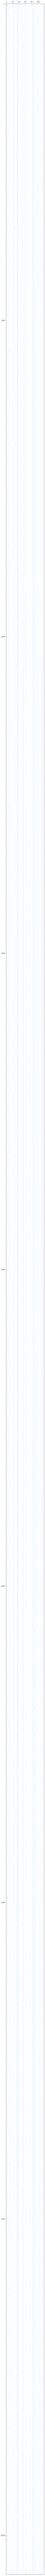

In [7]:
# Create a sparse matrix visualization of the dummy variables. 
# This shows the locations of non-zero entries in the matrix.
plt.spy(dummies, markersize=0.1)
fig = plt.gcf()
fig.set_size_inches(60,300)
plt.plot()
plt.show()